### Description 

Continuous Glucose Monitoring (CGM) measures glucose levels in a continuous manner. This measure provides information on blood glucose control and glucose variability and could be used to monitor patients with diabetes.

### Introduction

In healthy individuals, insulin secretion from the pancreas is responsible for maintaining normal blood glucose levels. Insulin resistance, the main cause of type-2 diabetes and a key aspect in several other metabolic disorders, occurs when the sensitivity to insulin is impaired leading to reduced insulin mediated glucose disposal. Measuring insulin levels is complex and requires special laboratory tests, while glucose levels are measured by simple blood tests. 

Although measuring blood glucose levels using a blood test is simple and inexpensive, a single measure of blood glucose will not contain information on glucose variability, and might not be accurate in certain conditions. 

CGM provides continuous measures of the glucose levels in the interstitial fluid, through a tiny electrochemical sensor electrode inserted under the skin. The continuous measures obtained with CGM present a tool to overcome the limitations of a single measure of blood glucose through blood tests, by providing real time information of glucose levels, rate of change, variability and impending hypo- and hyper- glycemia events.

Currently approved CGM devices use an enzymatic technology which reacts with glucose molecules in the interstitial fluid generating an electric current. This current is proportional to glucose concentration in the blood, thus providing information of blood glucose levels in a continuous manner.

Coupled with nutritional and behavioral information, data collected from the CGM could be used in research to better understand mechanisms of glucose response and control, and how these changes in different individuals, lifestyle choices and phenotypes.

The Human Phenotype Project (HPP) collects CGM data on each participant, to produce blood glucose measures every 15 minutes, for a total connection period of two weeks. Summary statistics are calculated for each CGM connection using the [iglu package](https://github.com/irinagain/iglu) ([Broll et al., 2021](https://doi.org/10.1371/journal.pone.0248560)), providing varying summary measures of glucose control and variability. 

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
FreeStyle Libre ProIQ Flash device (see figure below) is used for continuous glucose monitoring for a 2-week period in the baseline visit only. During this time participants are also required to log information about food, medications, physical activity and sleep hours using the HPP application.
During the baseline visit the sensor is placed on the participant’s upper arm back.

The figure illustrates the connection procedure of the device. Once attached the device is also activated. It is explained to the participant that in case of MRI the sensor should be removed before the scan, and that it is not possible to dive with the device deeper than one meter. The participant is requested to remove the device independently at the end of the 2-week period and send it back to the clinic.  

![CGM](cgm_device.jpeg)

### Data availability 
<!-- for the example notebooks -->
The metadata and summary features are stored in 3 main statistics parquet files: `cgm.parquet`, `iglu.parquet`, `iglu_daily.parquet` (Computed using the iglu package).

### Summary of available data 
<!-- for the data browser -->
1. Temporal data: A data frame of temporal glucose measures, along with time of measurement.  
2. Computed summary features: data frame containing, for each CGM connection, extracted features (computed using the iglu package) from the full CGM temporal data.

### Relevant links

* [Pheno Knowledgebase](https://knowledgebase.pheno.ai/datasets/017-cgm.html)
* [Pheno Data Browser](https://pheno-demo-app.vercel.app/folder/17)


In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('cgm')
pl

PhenoLoader for cgm with
94 fields
4 tables: ['cgm', 'iglu', 'iglu_daily', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,...,sexed,debut,completed,customer_field,dependency,old_data_loader,old_lab_data_column_name,min_plausible_value,max_plausible_value,parent_dataframe
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
cgm_time_series,CGM timeseries,File containing the participants' CGM timeseries,17,timeseries,Time series file (individual),Primary,NaN,Single,string,.parquet,...,Both sexes,2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
connection_id,ConnectionID,CGM device connection id,17,cgm,Text,Auxiliary,NaN,Single,int,NaN,...,Both sexes,2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collection_timestamp,Collection timestamp,CGM connection first data point timestamp,17,cgm,Datetime,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,...,Both sexes,2018-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cgm_connection_first_date,CGM first date,CGM connection first date,17,cgm,Date,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,...,Both sexes,2018-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cgm_connection_last_date,CGM last date,CGM connection last date,17,cgm,Date,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,...,Both sexes,2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cgm_device_type,CGM Device type,CGM Device type,17,cgm,Text,Auxiliary,017_01,Single,category,NaN,...,Both sexes,2018-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_cgm_datapoints_lost_in_qc,CGM datapoints lost in QC,Number of CGM datapoints lost in QC,17,cgm,Integer,Auxiliary,NaN,Single,int,NaN,...,Both sexes,2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
percentage_of_cgm_datapoints_lost_in_qc,Percentage of CGM datapoints lost in QC,NaN,17,cgm,Continuous,Auxiliary,NaN,Single,float,NaN,...,Both sexes,2018-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_cgm_days_available_for_the_connection,Number of CGM days available,Number of CGM days available for the connection,17,cgm,Integer,Auxiliary,NaN,Single,int,NaN,...,Both sexes,2018-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plot histogram and ecdf for cgm_ea1c at baseline visit


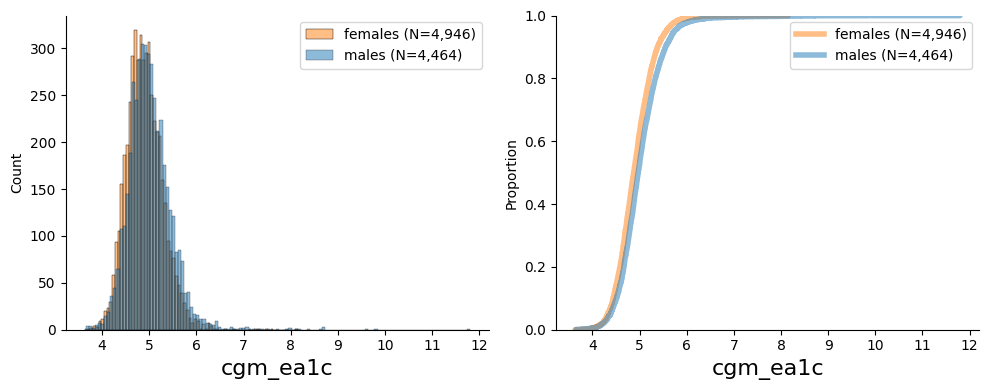

,count,mean,std,min,25%,50%,75%,max
cgm_ea1c,9410.0,4.956665,0.438063,3.634348,4.675833,4.921743,5.196036,11.796603


In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "cgm_ea1c"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)